In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os




In [24]:
df = pd.read_csv('/Users/shefalikatoch/Downloads/AMZN.csv')
dates = list(range(0,int(len(df))))
prices = df['Close']
#Impute missing values (NaN)
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])

/var/folders/gz/89nj82gn173_9ng2k_vt3fxc0000gn/T/ipykernel_42415/2459161329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])


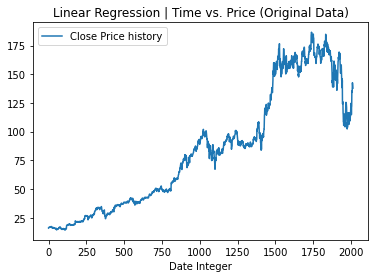

In [25]:
#Plot Original Data
plt.plot(df['Close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [26]:
#Convert to numpy array and reshape them
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices, (len(prices), 1))

In [27]:
#Load Pickle File to get the previous saved model accuracy
try:
  pickle_in = open("prediction.pickle", "rb")
  reg = pickle.load(pickle_in)
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.65)
  best = reg.score(ytrain, ytest)
except:
  pass

In [28]:
#Get the highest accuracy model
best = 0
for _ in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.65)
    reg = LinearRegression().fit(xtrain, ytrain)
    acc = reg.score(xtest, ytest)
    if acc > best:
        best = acc
        #Save model to pickle format
        with open('prediction.pickle','wb') as f:
            pickle.dump(reg, f)
        print(acc)

0.883874374919061
0.883958522147485
0.8856043122623616
0.8866071825731618
0.8874421959655239
0.8926958950861283
0.8951681334604202
0.8952657066678302


In [29]:
#Load linear regression model
pickle_in = open("prediction.pickle", "rb")
reg = pickle.load(pickle_in)

In [30]:
#Get the average accuracy of the model
mean = 0
for i in range(10):
  #Random Split Data
  msk = np.random.rand(len(df)) < 0.35
  xtest = dates[~msk]
  ytest = prices[~msk]
  mean += reg.score(xtest,ytest)

In [31]:
print("Average Accuracy:", mean/10)

Average Accuracy: 0.8887486601912823


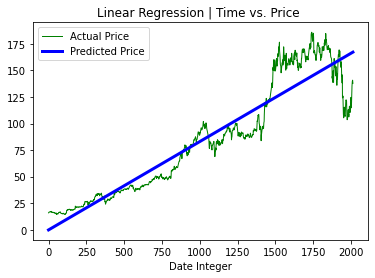

In [32]:
#Plot Predicted VS Actual Data
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [33]:
reg.score(xtest, ytest)

0.8826350981637214

In [34]:
from sklearn.metrics import r2_score
r2_score(ytest, reg.predict(xtest))

0.8826350981637214

In [35]:
reg.predict(np.array([[int(len(dates)+1)]]))

array([[167.37116556]])